<a href="https://colab.research.google.com/github/Srijan-Rai/Zomato-Restaurant-Clustering-Sentiment-Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS

In [ ]:
# Importing initial necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data paths
metadata_path = "/content/drive/MyDrive/Colab Notebooks/Zomato Clustering_Sentiment Analysis/Zomato Restaurant names and Metadata.csv"
reviews_path = "/content/drive/MyDrive/Colab Notebooks/Zomato Clustering_Sentiment Analysis/Zomato Restaurant reviews.csv"

In [ ]:
# Creating dataframes
metadata = pd.read_csv(metadata_path)
reviews = pd.read_csv(reviews_path)

In [ ]:
# metadata columns
metadata.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# reviews coulmns
reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

## Head

In [ ]:
metadata.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


## Tail

In [ ]:
metadata.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


## Data Analysis

Let us carry out some data preprocessing and data visualization on the given data, to obtain clean data and also to gain some more insights into the data before we start with the main objectives of our project.

### Info

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


* In the metadata dataframe, there are no numerical features.
* The shape of this dataframe is (105,6). Hence there are 105 entries and 6 features.
* As we could see, some of the features contain null values. These null values need to be handled further

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


* In the reviews dataframe, only Pictures is the feature with the numerical values
* The shape of this dataframe is (10000, 7), hence there are 10000 entries and 7 features
* There are some features that contain null values.

### Description

Let us get some basic description of the dataframes

In [ ]:
metadata.describe(include ="all")

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
reviews.describe(include ="all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Duplicates in the data

In [ ]:
metadata.duplicated().sum()

0

There are no duplicate entries in the metadata dataframe.

In [ ]:
reviews.duplicated().sum()

36

Since there are some duplicates in the dataframe, we would further review these entries and decide the necessary action that needs to be taken on these duplicates.

In [ ]:
reviews[reviews.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


Since all the entries for the duplicate restaurants are null, we would be dropping these entries

In [ ]:
reviews.drop_duplicates(inplace = True)

### Null Values in the data

In [ ]:
metadata.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

As we could see there are many null values under the collections feature. These collections are different tags provided by zomato for different restaurants. With the help of these collections, it becomes easier to filter out the restaurants which belong to a particular restaurant collection.

For the null values under collections, we would replace them with "No Collection", because these restaurants belong to no collections.

In [ ]:
metadata["Collections"].fillna("No Collection", inplace = True)

Since there are only 2 null values under timings feature, we would drop these entries from the dataframe.

In [ ]:
metadata.dropna(subset = ["Timings"],inplace = True)

In [ ]:
reviews.isna().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

Let us drop all the null values which are present in the reviews data frame, as there are very less number of null values in the data frame.

In [ ]:
reviews.dropna(inplace= True)

### Feature Engineering

Let us perform some feature engineering on the available datasets, which will help us to visualize the data easily and more efficiently. This step includes cleaning the data under different features, adding necessary features into the dataset by using the existing features, converting the datatypes of the features, etc.

#### Feature Engineering on Metadata

In [ ]:
# Metadata cost datatype conversion
metadata["Cost"] = metadata["Cost"].str.replace(",","")
metadata["Cost"] = metadata["Cost"].astype("float64")

From the above step we converted the data type of "Cost

In [ ]:
def num_of_Cusines(cuisines):
  """ Function to obtain the number of cuisines
      Parameter: Cuisines under the metadata dataframe"""
  cuisinelist = list(str(cuisines).split(","))
  return len(cuisinelist)

In [ ]:
metadata["Number_of_Cusines"] = metadata["Cuisines"].apply(num_of_Cusines)

The above step creates a new feature called the number of cuisines, to obtain the number of cuisines served in a restaurant.

In [ ]:
metadata.drop(["Links","Timings"], axis = 1, inplace = True)
metadata.rename(columns={"Name":"Restaurant"},inplace = True)

The above step drops the Links and Timings features which are not necessary for our further analysis.

The Name feature is renamed as Restaurant.

#### Feature Engineering on reviews data

In [ ]:
reviews = reviews[reviews["Rating"] != "Like"]
reviews["Rating"] = reviews['Rating'].astype("float64")

Te above step converts the datatype of Rating Feature to float.

In [ ]:
reviews["Time"] = pd.to_datetime(reviews["Time"])
reviews["Day"] = reviews["Time"].dt.day_name()
reviews["Hour"] = reviews["Time"].dt.hour

Converting the datatype of "Time" to datetime and creating new features to get the day and hour from it.

In [ ]:
# Splitting the metadata into two new features
reviews['No_of_Reviews'],reviews['No_of_Followers']=reviews['Metadata'].str.split(',').str
reviews['No_of_Reviews'] = pd.to_numeric(reviews['No_of_Reviews'].str.split(' ').str[0])
reviews['No_of_Followers'] = pd.to_numeric(reviews['No_of_Followers'].str.split(' ').str[1])

Obtaining the number of reviews and followers of the restaurant reviews.

#### Datasets after feature Engineering

In [ ]:
metadata

,Restaurant,Cost,Collections,Cuisines,Number_of_Cusines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",6
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese",3
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts",4
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",5
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...",5
...,...,...,...,...,...
100,IndiBlaze,600.0,No Collection,"Fast Food, Salad",2
101,Sweet Basket,200.0,No Collection,"Bakery, Mithai",2
102,Angaara Counts 3,500.0,No Collection,"North Indian, Biryani, Chinese",3
103,Wich Please,250.0,No Collection,Fast Food,1


In [ ]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Hour,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,Saturday,15,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Saturday,14,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,Friday,22,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Friday,22,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Friday,21,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,Sunday,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,Saturday,22,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,Friday,10,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,Tuesday,17,13,144.0


### Handling Outliers

Let us check for any oultiers present in the numeric features of the  dataframes through distribution plots and boxplots.

In [ ]:
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (8,8))
    plt.subplot(1,2,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,2,2)
    sns.boxplot(df[features[i]])

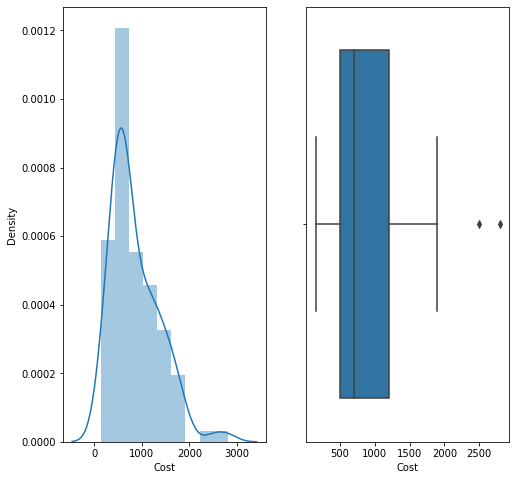

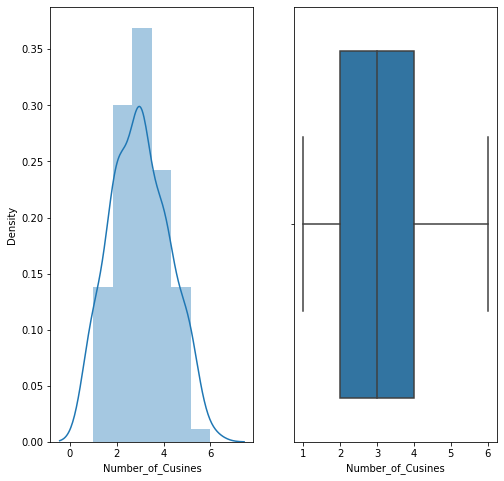

In [ ]:
outlier_plots(metadata,["Cost","Number_of_Cusines"])

From the above plots, we could conclude that there are no outliers in the metadata dataframe.

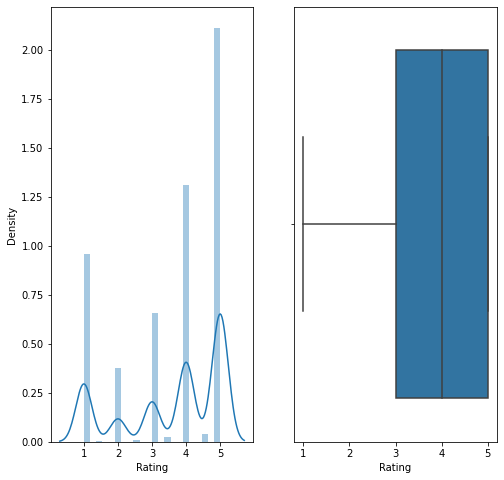

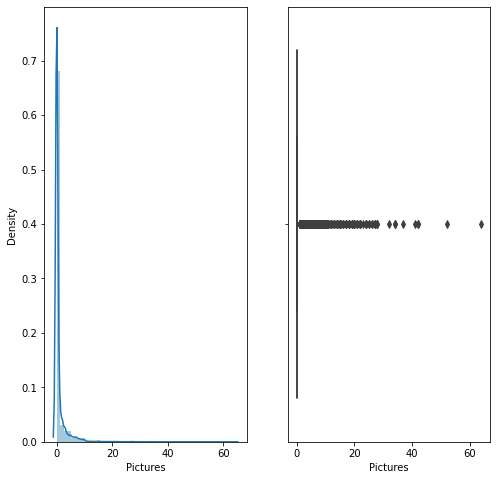

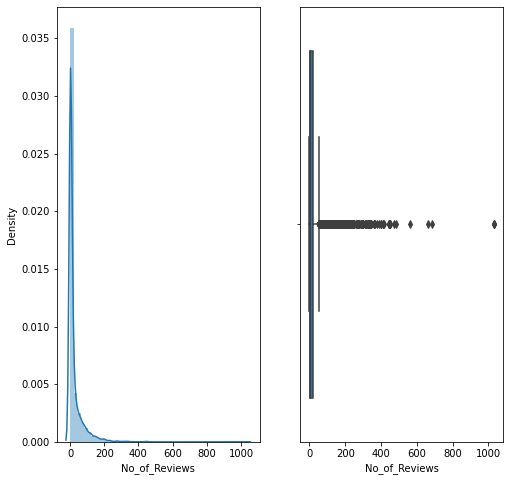

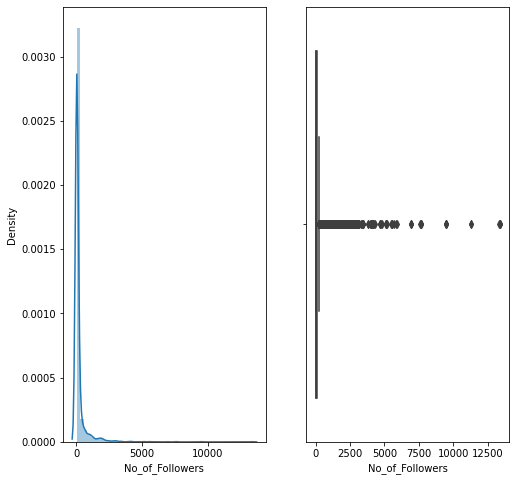

In [ ]:
outlier_plots(reviews,["Rating","Pictures","No_of_Reviews","No_of_Followers"])

From the above plots, we could see that there are some outliers in the reviews dataframe.

We would be dropping the entries which vary significantly from the rest of the entries

In [ ]:
outlier_values = np.where((reviews["Pictures"]<40) & (reviews["No_of_Reviews"]<500) & (reviews["No_of_Followers"]<6000))

In [ ]:
reviews = reviews.iloc[outlier_values]

Let us merge both the review and the metadata dataframes to obtain a single dataframe that we can for further analysis.

In [ ]:
# Getting numerical datas from reviews dataframe to perform some data visualizations.
reviews_numerical = reviews.groupby("Restaurant").agg({"Rating":"mean","Pictures":"sum","No_of_Reviews":"sum","No_of_Followers":"sum"})
reviews_numerical.columns = ["Average Ratings","Total Pictures","Total Reviews","Total Followers"]

In [ ]:
metadata_with_reviews = metadata.merge(reviews_numerical, on ="Restaurant")
metadata_with_reviews

,Restaurant,Cost,Collections,Cuisines,Number_of_Cusines,Average Ratings,Total Pictures,Total Reviews,Total Followers
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",6,4.186667,38,717,10061.0
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese",3,4.720930,2,236,798.0
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts",4,4.544118,54,624,2748.0
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",5,3.381579,30,1399,11843.0
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...",5,4.322917,44,1824,7010.0
...,...,...,...,...,...,...,...,...,...
94,Desi Bytes,400.0,No Collection,"North Indian, Chinese",2,2.975904,8,1442,10394.0
95,Hyderabadi Daawat,600.0,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",3,3.835443,229,4342,35881.0
96,Zega - Sheraton Hyderabad Hotel,1750.0,No Collection,"Asian, Sushi",2,4.353659,75,2693,28851.0
97,Triptify,400.0,No Collection,North Indian,1,3.558140,14,1691,9355.0


### Data Visualization

In this part, we will be visualizing the merged dataframe to obtain some important insights from the dataframe

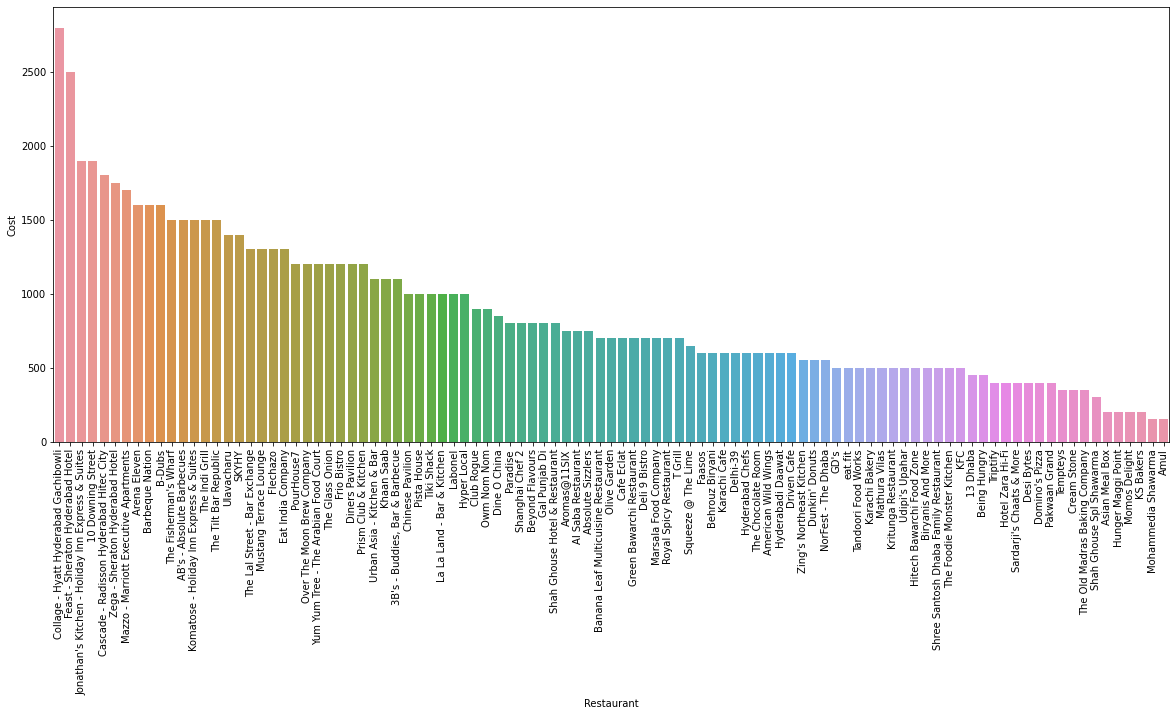

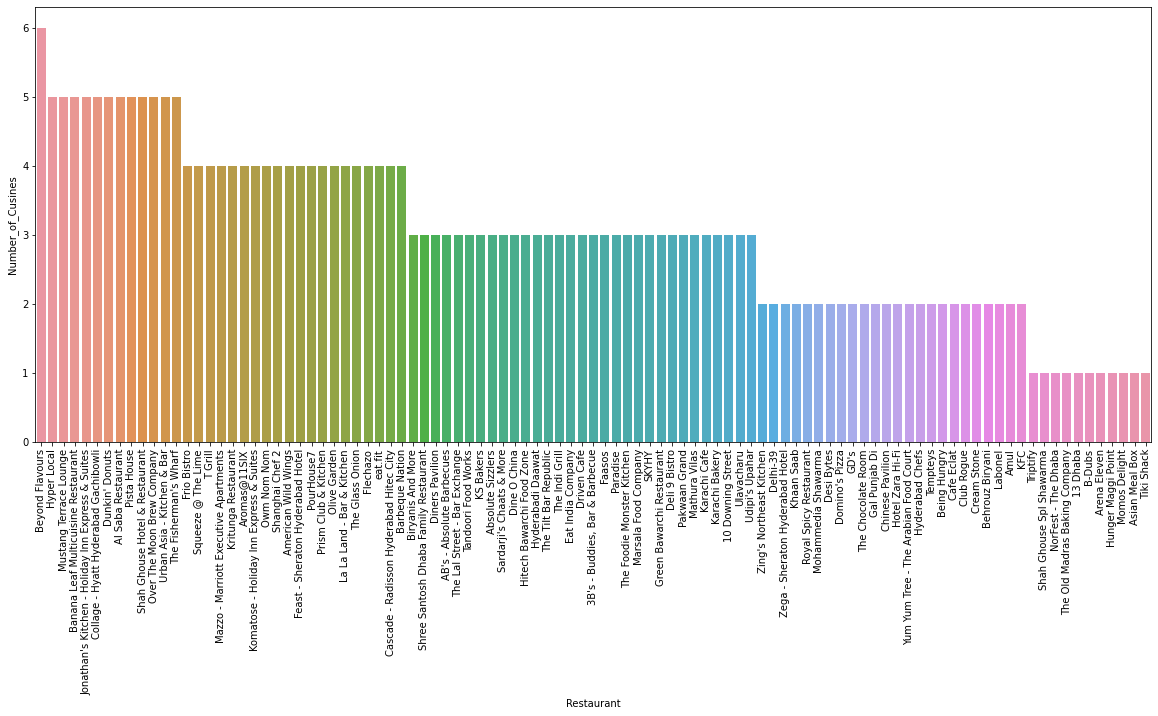

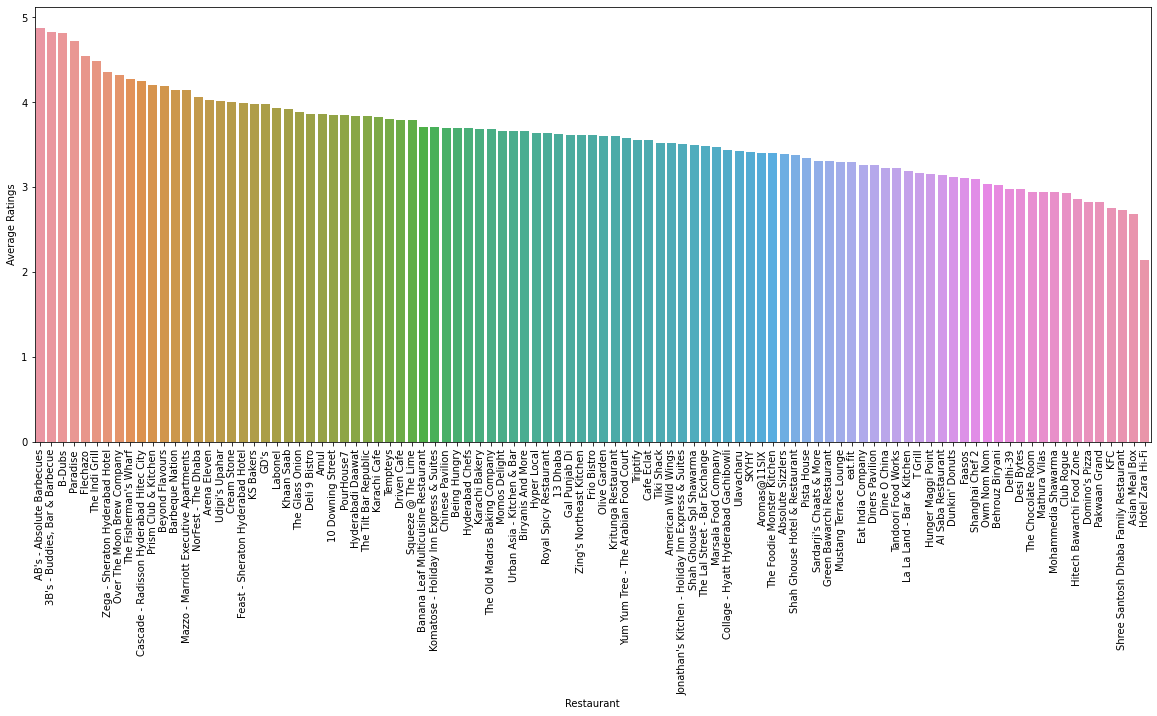

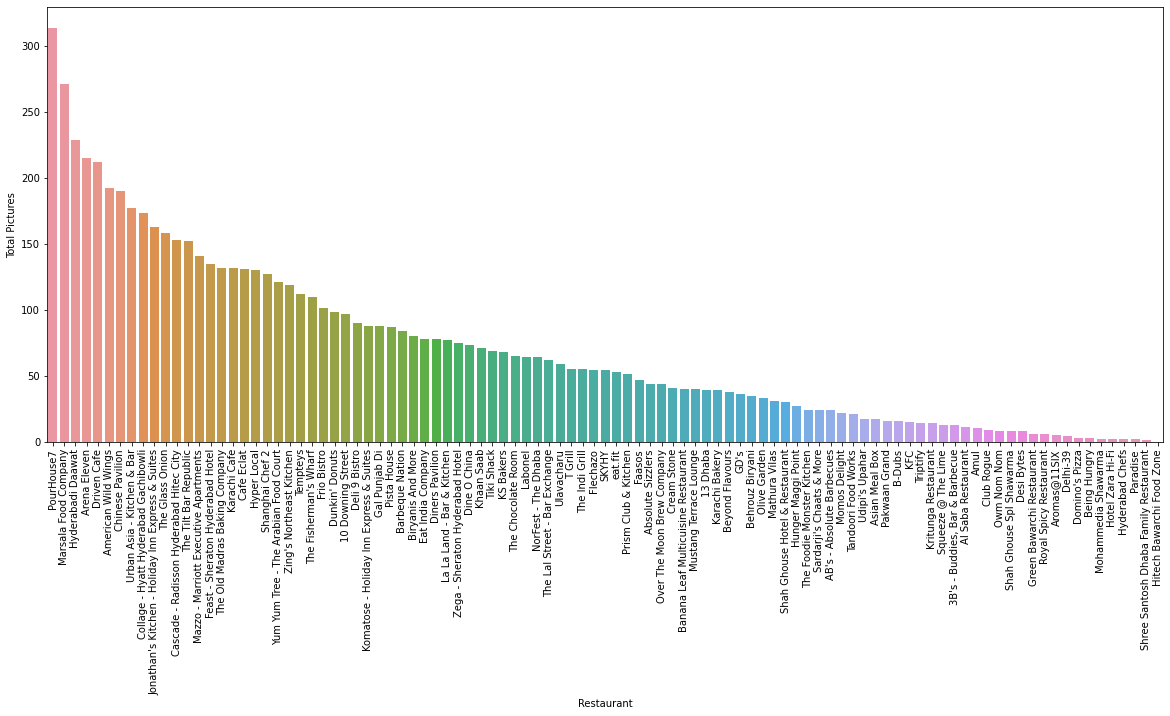

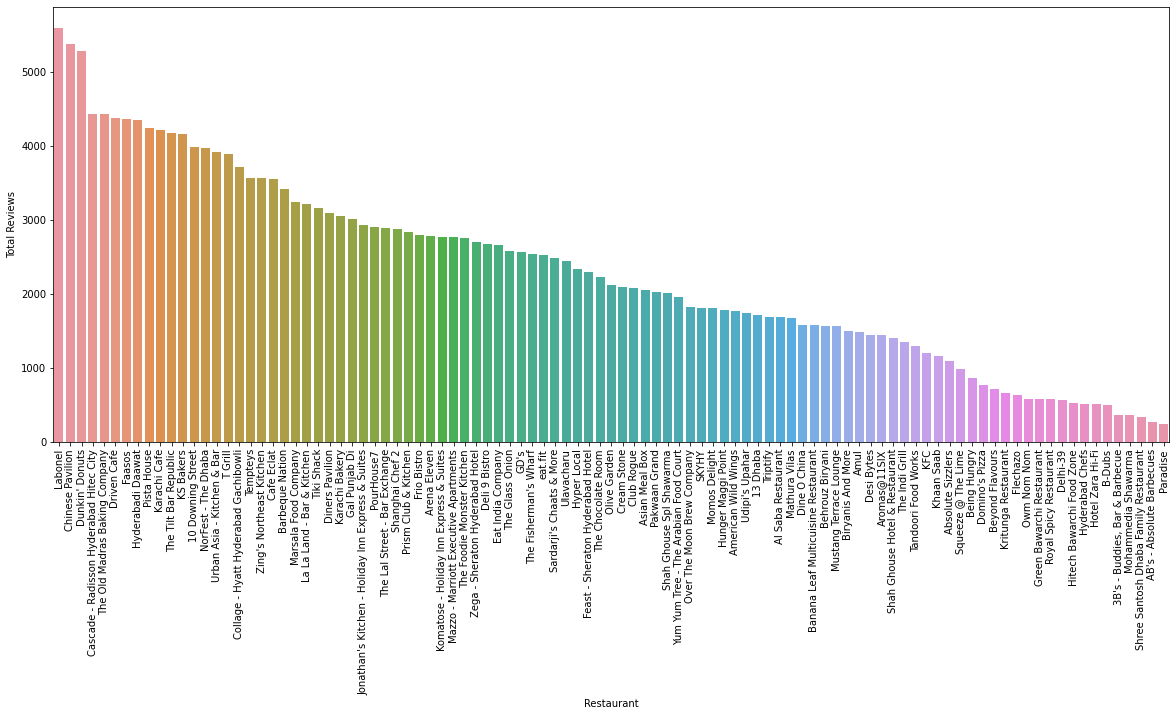

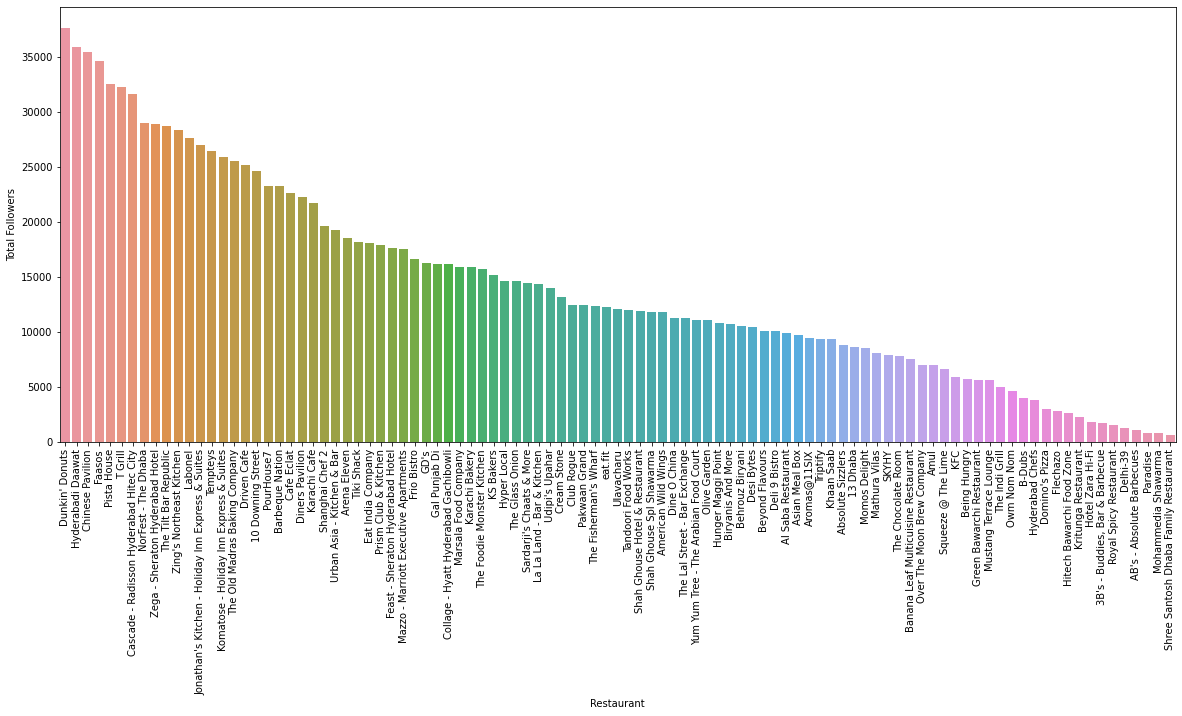

In [ ]:
for feature in ["Cost", "Number_of_Cusines","Average Ratings","Total Pictures","Total Reviews","Total Followers"]:
  plt.figure(figsize=[20,8])
  plt.xticks(rotation=90)
  sns.barplot(x= "Restaurant", y= feature , data = metadata_with_reviews.sort_values(by=feature, ascending = False))

Insights from the above boxplots:
* The top 5 costliest restaurants:

 Collage- Hyatt Hyderabad Gachibowli, Feast- Sherathon Hyderabad Hotel,      Jonathan's Kitchen- Holiday Inn Express and Suites, 10 Downing Street, Cascade - Radison Hyderabad Hitec City.
* Top 5 restaurants with highest number of cuisines:

  Beyond Flavors, Hyper Local, Mustang Terrace Lounge, Banana Leaf Multicuisine Restaurant, Jonathan's Kitchen- Holiday Inn Express and Suites.
* Top 5 highest rated restaurants:

  AB's- Absolute Barbecues, 3B's- Buddies, Bar & Barbecue, B-Dubs, Paradise, Flechazo.
* Top 5 restaurants with highest number of pictures posted in Zomato:

  PourHouse7, Marsala Food Company, Hyderabadi Dawat, Arena Eleven, Driven Cafe.
* Top 5 most reviewed restaurants:

  Labonel, Chinese Pavilion, Dunkin's Donuts, Cascade - Radison Hyderabad Hitec City, The Old Madras Baking Company.
* Top 5 restaurants with most number of followers:

  Dunkin's Donuts, Hyderabadi Dawat, Chinese Pavilion, Fasos, Pista House.   




In [ ]:
def getcount(dataFrame, columnName):
  """ Function to get the number of different cuisines and colections and also to get the count of it
      Parameters: Dataframe, Features(Cuisine/Collections)"""
  Count_df = {}
  for Collections_Cusines in dataFrame[columnName]:
    for name in Collections_Cusines.split(", "):
      if name in Count_df:
        Count_df[name] =  Count_df[name] + 1
      else:
        Count_df[name] = 1
  Count_df = pd.DataFrame(Count_df.values(), Count_df.keys(), columns = ["Count"]).reset_index()
  Count_df.rename(columns={'index': columnName}, inplace = True)
  return Count_df

In [ ]:
Collection_Count = getcount(metadata_with_reviews, "Collections" )

In [ ]:
Cuisines_Count = getcount(metadata_with_reviews, "Cuisines" )

In [ ]:
Collection_Count.sort_values(by="Count", ascending = False).head(10)

,Collections,Count
10,No Collection,49
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
11,Trending This Week,5
14,Veggie Friendly,4


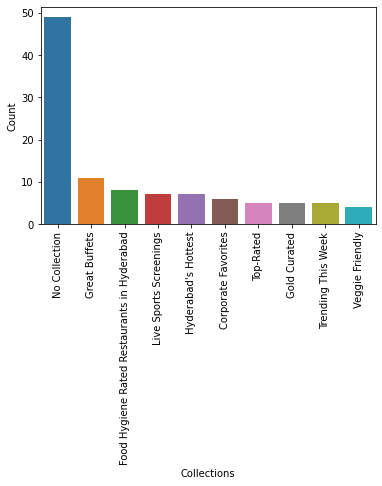

In [ ]:
plt.xticks(rotation = 90)
sns.barplot(x= "Collections", y= "Count", data = Collection_Count.sort_values(by="Count", ascending = False).head(10))

From the above plot, we could see that majority of restaurants come under No Collection, which means that majority of the restaurants are not been tagged to any collections. 

This is an important insight and Zomato can add the respective collections to these restaurants which would help to filter out these restaurants based on the collection it belongs to.

In [ ]:
Cuisines_Count.sort_values(by="Count", ascending = False).head(10)

,Cuisines,Count
5,North Indian,59
0,Chinese,41
1,Continental,21
6,Biryani,15
20,Italian,14
7,Asian,14
18,Fast Food,13
9,Desserts,13
4,South Indian,8
27,Mughlai,6


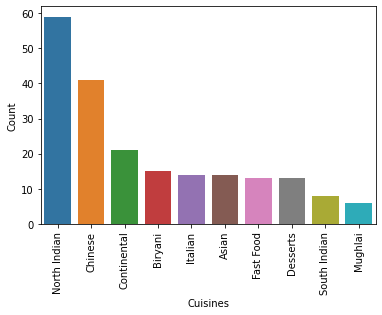

In [ ]:
plt.xticks(rotation = 90)
sns.barplot(x= "Cuisines", y= "Count", data = Cuisines_Count.sort_values(by="Count", ascending = False).head(10))

The above plot show us the top 10 cuisines served by the restaurants in Hyderabad.

In [ ]:
ratings_count = reviews["Rating"].value_counts()
ratings_count

5.0    3035
4.0    2185
1.0    1350
3.0    1079
2.0     562
4.5      66
3.5      47
2.5      18
1.5       9
Name: Rating, dtype: int64

In [ ]:
def getReviewCountPlots(feature):
  sns.countplot(reviews[feature].sort_values())
  plt.title(f"Counts of {feature}")

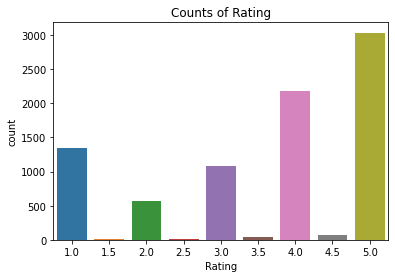

In [ ]:
getReviewCountPlots("Rating")

From the count plot on the Ratings we got to know that people tend to provide ratings on integers rather that float ratings. 

Most of the people have given 5 points as their rating.

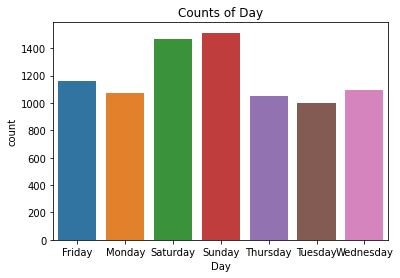

In [ ]:
getReviewCountPlots("Day")

From having an assumption as people review the restaurants only when they order food, From the above plot we could conclude that most of the people order food on Sundays and Saturdays. 

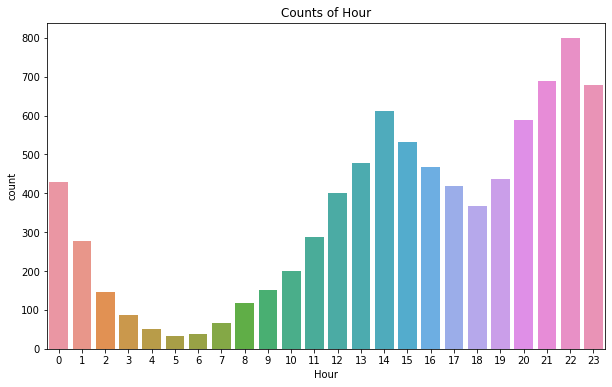

In [ ]:
plt.figure(figsize=(10,6))
getReviewCountPlots("Hour")

Most of the people order food for their lunch and dinner. 

Very less number of people order food for their breakfast.